<Figure size 1200x600 with 0 Axes>

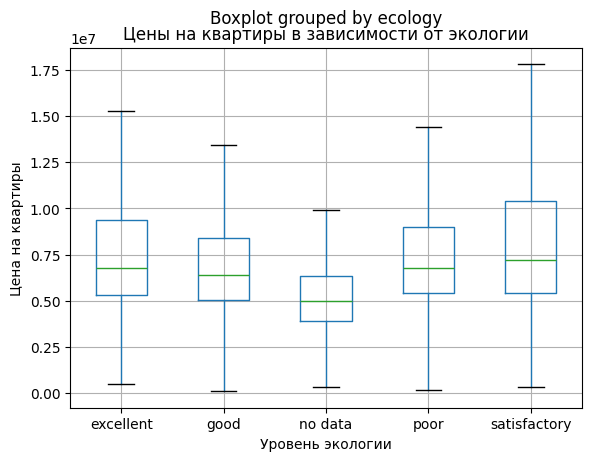

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Cleaning Data Sber/sber_data.csv')
#sber_data.head()
#display(sber_data.tail())
#display(sber_data.info())
#print(sber_data['sub_area'].nunique())
#print(sber_data['price_doc'].max())
plt.figure(figsize=(12,6))
sber_data.boxplot(column='price_doc', by='ecology', showfliers=False)
plt.title('Цены на квартиры в зависимости от экологии')
plt.xlabel('Уровень экологии')
plt.ylabel('Цена на квартиры')
plt.show()

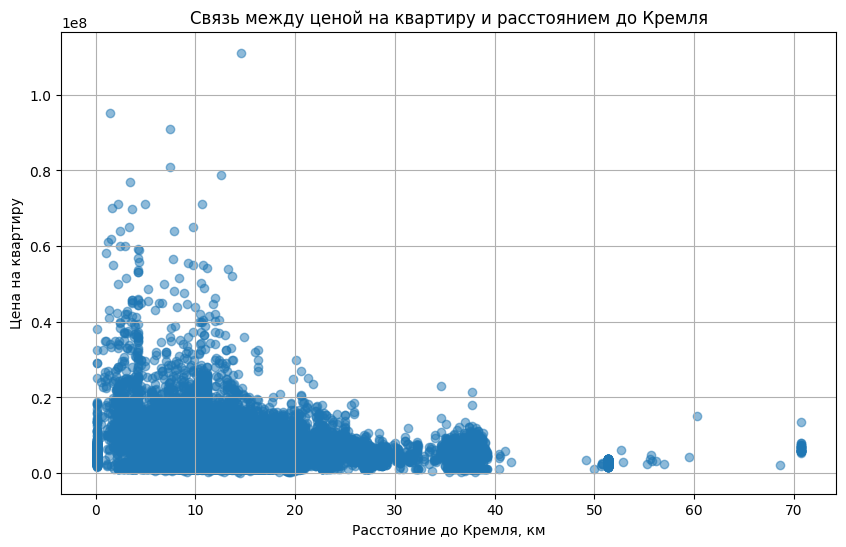

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

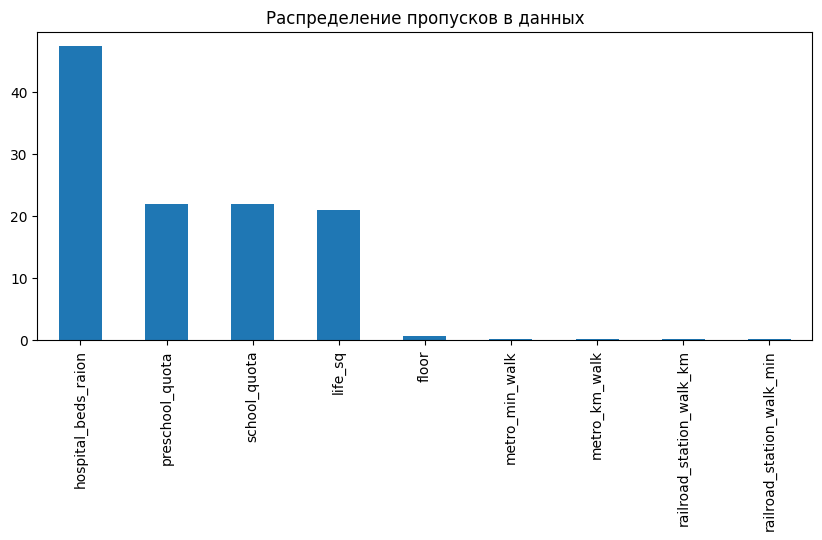

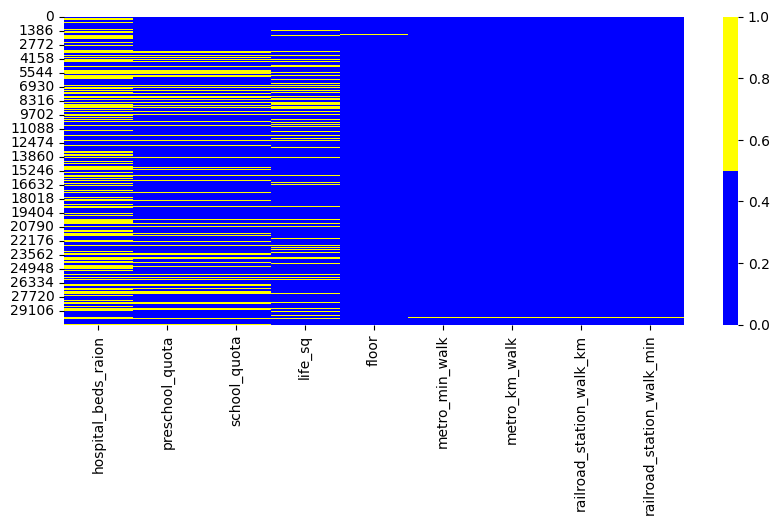

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Cleaning Data Sber/sber_data.csv')
plt.figure(figsize=(10, 6))
plt.scatter(sber_data['kremlin_km'], sber_data['price_doc'], alpha=0.5)
plt.title("Связь между ценой на квартиру и расстоянием до Кремля")
plt.xlabel("Расстояние до Кремля, км")
plt.ylabel("Цена на квартиру")
plt.grid(True)
plt.show()
display(sber_data.isnull().tail())
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
)
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

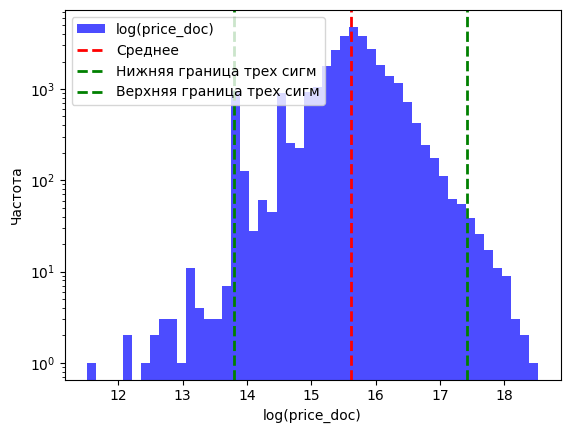

In [25]:
#Постройте гистограмму для признака price_doc в логарифмическом масштабе. 
# А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sber_data = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Cleaning Data Sber/sber_data.csv')
sber_data['log_price_doc']=np.log(sber_data['price_doc'])
mean_price=sber_data['log_price_doc'].mean()
std_price=sber_data['log_price_doc'].std()
lower_bound=mean_price-3*std_price
upper_bound=mean_price+3*std_price
plt.hist(sber_data['log_price_doc'], bins=50, log=True, color='blue', alpha=0.7, label='log(price_doc)')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label='Среднее' )
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label='Нижняя граница трех сигм' )
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Верхняя граница трех сигм' )

plt.xlabel('log(price_doc)')
plt.ylabel('Частота')
plt.legend()
plt.show()




In [41]:
import pandas as pd
import numpy as np
sber_data = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Cleaning Data Sber/sber_data.csv')
sber_data['log_price_doc'] = np.log1p(sber_data['price_doc']) 
# Вычисление среднего и стандартного отклонения в логарифмической шкале
mean_price = sber_data['log_price_doc'].mean() 
std_price = sber_data['log_price_doc'].std()
# Послабление на 0.7 сигм 
lower_bound = mean_price - 0.7 * std_price
upper_bound = mean_price + 0.7 * std_price 
# Нахождение потенциальных выбросов 
outliers = sber_data[(sber_data['log_price_doc'] < lower_bound) | (sber_data['log_price_doc'] > upper_bound)] 
num_outliers=len(outliers)
print(num_outliers)


10690


In [44]:
import pandas as pd
sber_data = pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Cleaning Data Sber/sber_data.csv')

def outliers_iqr_mod(sber_data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        sber_data[feature] = np.log1p(sber_data[feature])

    Q1 = sber_data[feature].quantile(0.25)
    Q3 = sber_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - left * IQR
    upper_bound = Q3 + right * IQR

    outliers = sber_data[(sber_data[feature] < lower_bound) | (sber_data[feature] > upper_bound)]
    cleaned_data = sber_data[(sber_data[feature] >= lower_bound) & (sber_data[feature] <= upper_bound)]

    return outliers, cleaned_data

# Число выбросов в данных
num_outliers = len(outliers)
print("Число выбросов в данных:", num_outliers)


Число выбросов в данных: 10690
